In [1]:
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ron_bias = []
bias_level = []

In [3]:
std_array, mean_array = [],[]
for i in range(10):
    bias = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/bias gain 2/bias-{i+1}.tiff", plugin="tifffile")
    std_bias, mean_bias = np.std(bias[0:100,100:200]), np.mean(bias[0:100,100:200])
    std_array.append(std_bias)
    mean_array.append(mean_bias)
print(mean_array)
print(std_array)

[99.4251, 99.3427, 99.32, 99.429, 99.429, 99.429, 99.429, 99.429, 99.2968, 99.5153]
[6.976345030888309, 7.087175510032187, 7.105096762184171, 6.916166495971594, 6.916166495971594, 6.916166495971594, 6.916166495971594, 6.916166495971594, 7.143060251740847, 6.862431486725387]


In [4]:
print(f"the readout noise = {np.round(np.mean(std_array),3)} \u00B1 {np.round(np.std(std_array),3)} ADU")
print(f"the mean bias level = {np.round(np.mean(mean_array),3)} \u00B1 {np.round(np.std(mean_array),3)} ADU")

the readout noise = 6.975 ± 0.094 ADU
the mean bias level = 99.404 ± 0.062 ADU


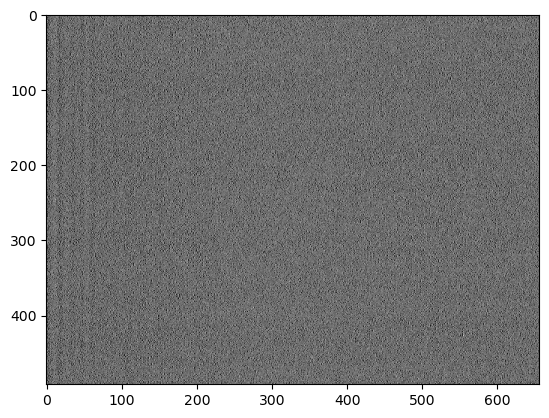

In [5]:
plt.imshow(bias, cmap='gray')

In [6]:
masterbias = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/masterbias.tiff", plugin="tifffile")
print(masterbias[0:100,100:200].mean())
print(masterbias[0:100,100:200].std())

99.6092
5.6927166


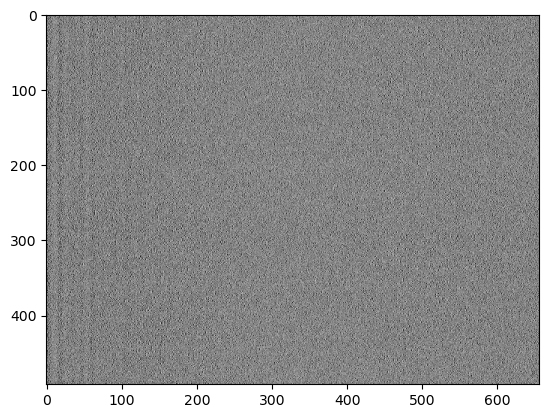

In [7]:
plt.imshow(masterbias, cmap='gray')

In [8]:
import pandas as pd
df = pd.DataFrame(masterbias)
df

,0,1,2,3,4,5,6,7,8,9,...,646,647,648,649,650,651,652,653,654,655
0,106.0,88.5,101.0,101.0,110.5,82.0,103.0,102.0,97.0,102.0,...,102.0,96.0,108.0,84.5,107.0,102.0,98.5,100.0,107.5,91.0
1,103.0,100.5,103.0,96.0,105.5,98.5,106.0,101.5,101.0,98.0,...,100.0,99.0,100.0,106.0,100.0,96.0,102.5,100.0,104.0,98.0
2,91.0,95.0,98.0,98.0,97.0,98.0,85.0,110.0,96.0,101.0,...,100.0,104.0,97.0,105.0,108.5,81.0,100.0,99.0,99.5,101.0
3,101.0,96.0,97.5,104.0,98.0,97.0,100.0,99.0,104.5,96.0,...,103.0,99.0,105.5,104.0,96.5,100.0,102.0,100.0,98.0,102.0
4,83.0,108.5,102.0,98.0,109.0,86.0,90.0,107.5,100.0,103.0,...,107.5,90.0,103.0,97.0,100.0,101.0,98.0,99.0,100.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,97.0,100.0,107.0,81.0,99.0,97.0,100.0,102.5,96.0,103.0,...,102.0,104.0,97.0,99.0,103.0,98.0,96.0,99.0,102.0,97.0
488,98.0,96.0,99.0,98.0,103.5,96.5,82.0,108.0,100.0,100.0,...,101.0,100.0,105.5,95.0,98.5,100.0,85.0,107.0,98.0,99.0
489,111.0,85.0,95.5,92.0,110.5,83.0,100.0,103.0,105.0,99.0,...,102.0,97.5,92.0,106.0,101.0,96.0,103.0,98.0,101.0,99.0
490,97.0,97.0,100.0,99.0,97.0,99.0,102.0,101.0,100.0,100.0,...,98.0,102.0,99.0,103.5,99.0,101.0,105.0,106.0,97.0,103.0


In [9]:
mean_bias = []
for column in df:
    mean_bias.append(np.mean(df[column]))
len(mean_bias)

656

[Text(0.5, 1.0, 'Mean bias column'),
 Text(0.5, 0, 'column number'),
 Text(0, 0.5, 'ADU'),
 (-10.0, 700.0),
 (97.0, 102.0)]

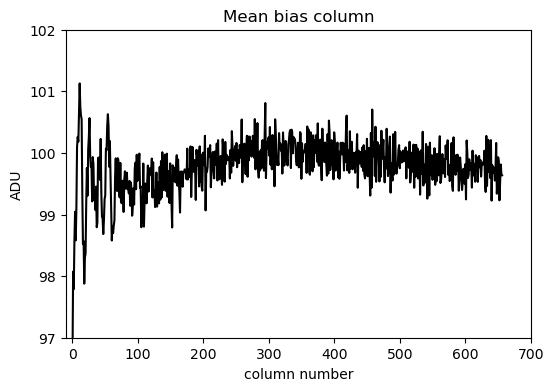

In [10]:
x = np.linspace(0,len(mean_bias),len(mean_bias))
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x,mean_bias,'k')
ax.set(title="Mean bias column", xlabel='column number', ylabel='ADU', xlim=(-10,700), ylim=(97,102))

In [11]:
mean_row_bias = []
df1 = pd.DataFrame.transpose(df)
df1

,0,1,2,3,4,5,6,7,8,9,...,482,483,484,485,486,487,488,489,490,491
0,106.0,103.0,91.0,101.0,83.0,109.0,83.0,97.0,83.0,110.0,...,100.0,98.0,103.0,109.0,84.0,97.0,98.0,111.0,97.0,103.0
1,88.5,100.5,95.0,96.0,108.5,81.0,111.0,97.0,109.0,82.0,...,98.0,99.0,89.5,80.5,110.5,100.0,96.0,85.0,97.0,98.0
2,101.0,103.0,98.0,97.5,102.0,107.0,89.5,107.5,87.0,98.0,...,89.0,92.5,107.5,109.0,102.0,107.0,99.0,95.5,100.0,100.0
3,101.0,96.0,98.0,104.0,98.0,84.0,106.0,83.5,109.0,102.5,...,103.5,105.5,86.5,89.0,100.0,81.0,98.0,92.0,99.0,97.0
4,110.5,105.5,97.0,98.0,109.0,84.0,100.0,105.0,98.0,96.5,...,108.5,101.0,103.0,96.0,103.0,99.0,103.5,110.5,97.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,102.0,96.0,81.0,100.0,101.0,102.0,98.0,98.0,93.0,99.0,...,99.0,104.0,103.0,103.0,98.0,98.0,100.0,96.0,101.0,111.0
652,98.5,102.5,100.0,102.0,98.0,100.0,100.0,102.0,109.5,99.0,...,105.0,98.5,103.0,100.0,99.0,96.0,85.0,103.0,105.0,104.5
653,100.0,100.0,99.0,100.0,99.0,102.5,98.0,102.0,90.0,98.5,...,96.0,98.5,97.0,106.0,105.0,99.0,107.0,98.0,106.0,102.0
654,107.5,104.0,99.5,98.0,100.0,98.0,103.0,98.0,100.0,103.0,...,100.0,83.0,101.0,83.0,106.5,102.0,98.0,101.0,97.0,101.0


In [12]:
for row in df1:
    mean_row_bias.append(np.mean(df1[row]))
len(mean_row_bias)

492

[Text(0.5, 1.0, 'Mean bias row'),
 Text(0.5, 0, 'row number'),
 Text(0, 0.5, 'ADU'),
 (-10.0, 550.0),
 (98.5, 101.0)]

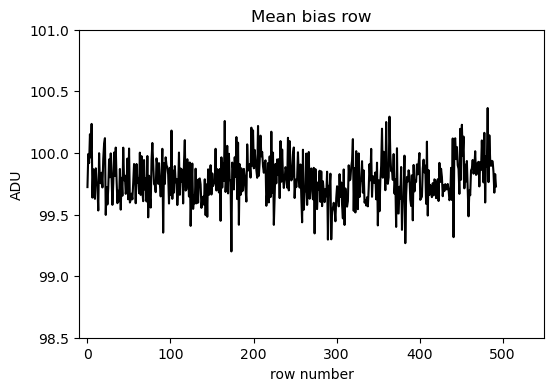

In [13]:
x1 = np.linspace(0,492,492)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x1,mean_row_bias,'k')
ax.set(title="Mean bias row", xlabel='row number', ylabel='ADU', xlim=(-10,550), ylim=(98.5,101))

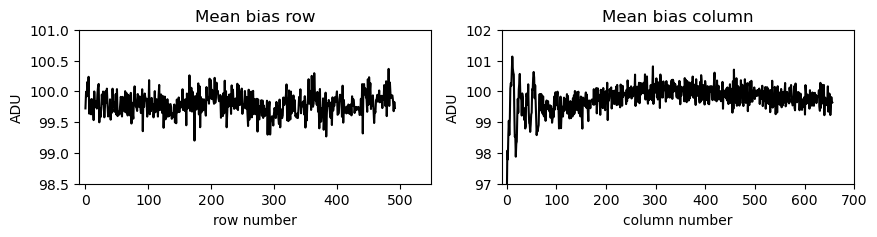

In [14]:
fig, ax1 = plt.subplots(1,2,figsize=(10,2))
#fig.subplots_adjust(hspace=0.7)
ax1[0].plot(x1,mean_row_bias,'k')
ax1[0].set(title="Mean bias row", xlabel='row number',ylabel='ADU', xlim=(-10,550), ylim=(98.5,101))
ax1[1].plot(x,mean_bias,'k')
ax1[1].set(title="Mean bias column", xlabel='column number', ylabel='ADU', xlim=(-10,700), ylim=(97,102))
plt.savefig("ALTS-Mean bias row and column.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

[Text(0.5, 1.0, 'Histogram, single bias image'),
 Text(0.5, 0, 'ADU'),
 Text(0, 0.5, 'Frequency')]

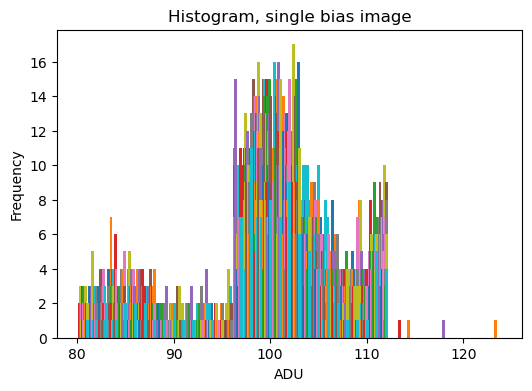

In [15]:
bias_array = np.array(bias, dtype=float)
data = bias_array[0:100,100:200]
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(data,bins=np.arange(data.min(), data.max()+1), width=0.3)
ax.set(title='Histogram, single bias image', xlabel="ADU", ylabel='Frequency')

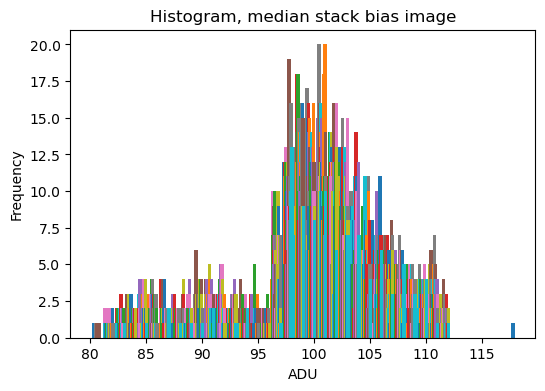

In [16]:
masterbias_arr = np.array(masterbias, dtype=float)
data1 = masterbias_arr[0:100,100:200]
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(data1,bins=np.arange(data1.min(), data1.max()+1), width=0.3)
ax.set(title='Histogram, median stack bias image', xlabel="ADU", ylabel='Frequency')
plt.savefig("ALTS-median stack bias image.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [17]:
dark_30s = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/dark-30s-1.tiff", plugin="tifffile")
dark_50s = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-17/flat transfer curve gain 2/dark-50s-1.tiff", plugin="tifffile")
df4 = pd.DataFrame(dark_30s)
df5 = pd.DataFrame(dark_50s)

In [18]:
x = np.linspace(0,656,656)
y = np.linspace(0,492,492)
X, Y = np.meshgrid(x,y)

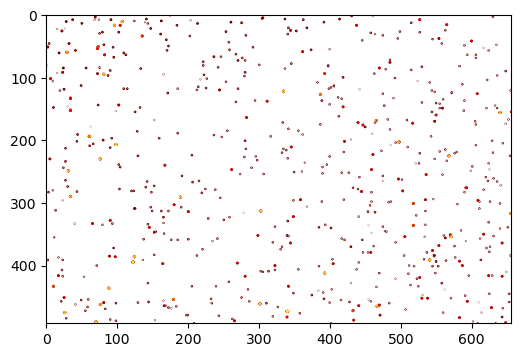

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
ax.contour(X,Y, df4, cmap='hot')
ax.set(ylim=(492,0))
plt.savefig("ALTS-Countour Dark 30s.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

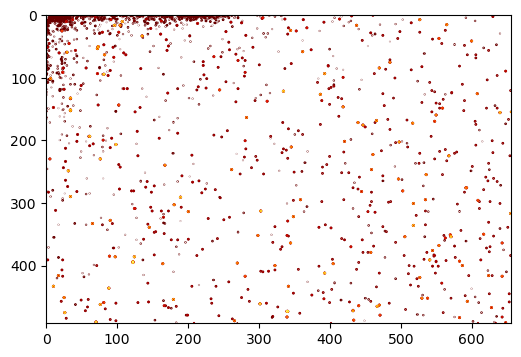

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
ax.contour(X,Y, df5, cmap='hot')
ax.set(ylim=(492,0))
plt.savefig("ALTS-Countour Dark 50s.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

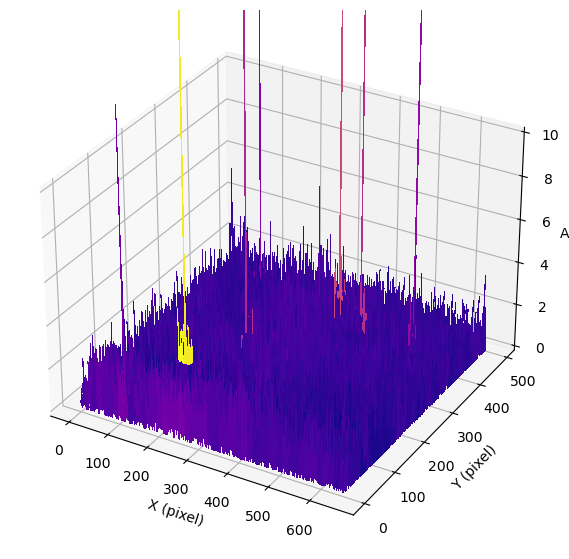

<Figure size 640x480 with 0 Axes>

In [29]:
from matplotlib.ticker import LinearLocator

flat_variasi = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/flat variasi/masterflat_variasi.tiff", plugin="tifffile")
df6 = pd.DataFrame(flat_variasi)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7,7))

# Make data.
Z = df6

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='plasma', linewidth=0, antialiased=False)
ax.set(xlabel='X (pixel)', ylabel='Y (pixel)', zlabel='ADU')
# Customize the z axis.
ax.set_zlim(flat_variasi.min(), 10)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')
plt.show()
plt.savefig("ALTS-Surface Masterflat.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

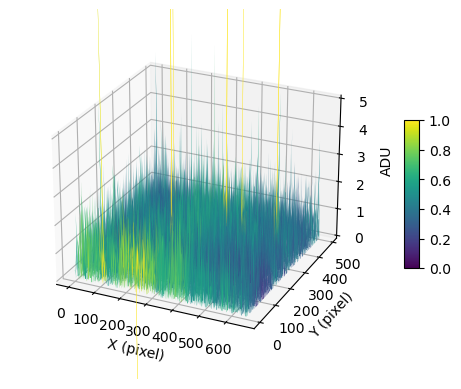

In [94]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z,cmap='viridis', linewidth=0.3, vmin=0, vmax=1)
fig.colorbar(surf, shrink=0.4, aspect=10)
ax.set(xlabel='X (pixel)', ylabel='Y (pixel)', zlim=(0,5))
ax.set_zlabel('ADU', rotation='vertical')
ax.view_init(25, -65, 0)
ax.set_box_aspect(None, zoom=0.9)
plt.show()

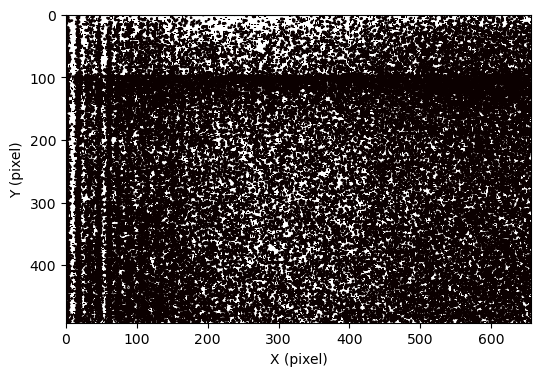

In [104]:
fig, ax = plt.subplots(figsize=(6,4))
ax.contour(X,Y, df6, cmap='hot', vmin=0, vmax=0.05)
ax.set(ylim=(492,0), xlabel='X (pixel)', ylabel='Y (pixel)')
plt.savefig("ALTS-Countour Masterflat.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)